## Лабораторная работа №4. Оценка качества моделей машинного обучения.
### Часть 1. Задача бинарной классификации.

Используемый набор данных: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/"
downloadFile(url + "/wdbc.data", "dataset/wdbc.data")
downloadFile(url + "/wdbc.names", "dataset/wdbc.names")

In [3]:
headers = ["ID", "Diagnosis", "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
           "Compactness Mean", "Concavity Mean", "Concave points Mean", "Symmetry Mean", "Fractal dimension Mean",
           "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE",
           "Concave points SE", "Symmetry SE", "Fractal dimension SE", "Radius Worst", "Texture Worst", "Perimeter Worst",
           "Area Worst", "Smoothness Worst", "Compactness Worst", "Concavity Worst", "Concave points Worst",
           "Symmetry Worst", "Fractal dimension Worst"]  
data = pd.read_csv("dataset/wdbc.data", names=headers)
data = data.astype({"Diagnosis": "category"})
data.sample(40)

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
388,903011,B,11.270,15.50,73.38,392.0,0.08365,0.11140,0.100700,0.027570,0.1810,0.07252,0.3305,1.0670,2.569,22.970,0.010380,0.066690,0.094720,0.020470,0.01219,0.012330,12.040,18.93,79.73,450.0,0.11020,0.28090,0.30210,0.08272,0.2157,0.10430
184,873885,M,15.280,22.41,98.92,710.6,0.09057,0.10520,0.053750,0.032630,0.1727,0.06317,0.2054,0.4956,1.344,19.530,0.003290,0.013950,0.017740,0.006009,0.01172,0.002575,17.800,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,0.3132,0.9789,3.280,16.940,0.018350,0.067600,0.092630,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
73,859983,M,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,0.2787,0.6205,1.957,23.350,0.004717,0.020650,0.017590,0.009206,0.01220,0.003130,16.570,20.86,110.30,812.4,0.14110,0.35420,0.27790,0.13830,0.2589,0.10300
39,855138,M,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,0.2130,0.5914,1.545,18.520,0.005367,0.022390,0.030490,0.012620,0.01377,0.003187,15.530,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.2397,0.07800,0.9555,3.5680,11.070,116.200,0.003139,0.082970,0.088900,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
332,897132,B,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.9660,1.959,19.620,0.012890,0.011040,0.003297,0.004967,0.04243,0.001963,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
494,914102,B,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.070,0.007802,0.020520,0.013410,0.005564,0.02086,0.002701,14.500,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,0.1803,1.2220,1.528,11.770,0.009058,0.021960,0.030290,0.011120,0.01609,0.003570,10.760,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
260,887549,M,20.310,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.093330,0.1814,0.05572,0.3977,1.0330,2.587,52.340,0.005043,0.015780,0.021170,0.008185,0.01282,0.001892,24.330,39.16,162.30,1844.0,0.15220,0.29450,0.37880,0.16970,0.3151,0.07999


In [4]:
data.isna().sum()

ID                         0
Diagnosis                  0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave points Mean        0
Symmetry Mean              0
Fractal dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave points SE          0
Symmetry SE                0
Fractal dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave points Worst       0
Symmetry Worst             0
Fractal dimension Worst    0
dtype: int64

Пропусков в данных нет.

Подготовим данные для классификации: выберем признаки и метки и сформируем тренировочные и тестовые наборы.

In [5]:
X = data.drop(columns=["ID", "Diagnosis"]).copy()
y = data["Diagnosis"].copy().cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

Создадим классификатор, обучим его, а затем выполним классификацию.

In [6]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) 
y_pred = dtc.predict(X_test)

Оценим получившуюся классификацию.

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        69
           1       0.93      0.87      0.90        45

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [8]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

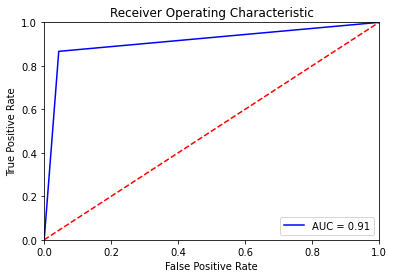

In [9]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Высокое значение AUC говорит о качественной классификации.